## Numerical Linear Algebra

In [19]:
import numpy as np
import matplotlib.pyplot as plt
import math
from sympy import Matrix
from sympy import init_printing

# Question Four

In [20]:
x_i = Matrix([[1,1.001],[1,1.002],[1,1.003],[1,1.004],[1,1.005],[1,1.006],[1,1.007]])
y_i = Matrix([3.665,3.789,3.891,4.022,4.233,5.200,5.329])

## To Obtain the inverse of $X^T X$

In [21]:
x_inver = (x_i.T @ x_i).inv()
x_inver

Matrix([
[   36000.71428525, -35857.1428566805],
[-35857.1428566805,  35714.2857138252]])

 ## To compute for the $\infty  - norm$  of  $x_i^Tx_i$ and  ∞−norm of $(x_i^Tx_i)^{-1}$  

## $X1 =  \|x_i^Tx_i \|_{\infty} $ ,
## $X2 =  \|(x_i^Tx_i)^{-1} \|_{\infty} $
## $X3 = \|x_i^Tx_i \|_{\infty} \|(x_i^Tx_i)^{-1} \|_{\infty} $

In [25]:
X1 = np.linalg.norm(x_i.T @ x_i,np.inf)
X2 = np.linalg.norm(x_inver,np.inf)
X3 = X1*X2
X3

1012056.12008695

#### Since,the condition number is large, then the linear system is ill conditioned and no matter what algorithm we use to solve it, small errors in the calculations will amplify and cause large errors in the system.

 #### Given that $$X^T X
\begin{pmatrix} m \\ b \end{pmatrix}= X^T Y \\
\begin{pmatrix} m \\ b \end{pmatrix} = (X^T X)^{-1}X^T Y $$

In [26]:
m,b = x_inver * (x_i.T @ y_i)

In [27]:
print(f'The coefficient of the system are: {m} and {b}')

The coefficient of the system are: -288.146714282222 and 291.285714281956


# Question Five


<!-- 
Finding the angle of rotation of the ellipse's axes with respect to the x-y coordinate plane.

$$\theta = \frac{1}{2} tan^{-1}(\frac{b}{-1 - a})$$

Transforming the equation we have,

$$a'x'^2+b'y'^2+c'x+d'y'+e=0$$

where,

$$a'=-cos^2(\theta)+bsin(\theta)cos(\theta)+asin^2(\theta)$$

$$b'=-sin^2(\theta)-bsin(\theta)cos(\theta)+acos^2(\theta)$$

$$c'=ccos(\theta)+dsin(\theta)$$

$$d'=-csin(\theta)+dcos(\theta)$$

$$e'=e$$

Finding the (nearly) standard form of the ellipse, we  complete the squares for the x' and y' portions , then rearrange the equation slightly:

$$\frac{(x'-h)^2}{a''^2}+\frac{(y'-k)^2}{b''^2}=c''$$

where,

$$a''=\frac{1}{\sqrt{a'}}$$

$$b''=\frac{1}{\sqrt{b'}}$$

$$c''=\frac{c'^2}{4a'}+\frac{d'^2}{4b'}-e'$$

$$h=-\frac{c'}{2a'}$$

$$k=-\frac{d'}{2b'}$$

Since, we know the values of \theta, we can now parametrize the equations for x' and y':

$$x'=h+a''\sqrt{c''}sin(t)$$

$$y'=k+b''\sqrt{c''}cos(t)$$

Then,rotate it back into normal x-y space using this formulas below.

$$x=x'cos(\theta)-y'sin(\theta)$$
&
$$y=x'sin(\theta)+y'cos(\theta)$$ -->

In [28]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit
from sympy import *

In [29]:
x = [1.02, 0.95, 0.87, 0.77, 0.67, 0.56, 0.44, 0.30, 0.16, 0.01]
y = [0.39, 0.32, 0.27, 0.22, 0.18, 0.15, 0.13, 0.12, 0.13, 0.15]
b = [i ** 2 for i in x]
listk = [] 
def function(): 
    for i in range(len(x)):
        w = [0] * 5
        w[0] = y[i] ** 2
        w[1] = x[i] * y[i]
        w[2] = x[i]
        w[3] = y[i]
        w[4] = 1
        listk.append(w)
    return listk

function()
t = np.linalg.lstsq(listk,b)[0]
print('constant a = ', t[0])
print('constant b = ', t[1])
print('constant c = ', t[2])
print('constant d = ', t[3])
print('constant e = ', t[4])

def func(x,y,a,b,c,d,e):
    y=a*y**2-b*x*y-c*x-d*y-e-x**2
    return y

constant a =  -2.635625483712115
constant b =  0.1436461825988976
constant c =  0.5514469631403572
constant d =  3.2229403381059027
constant e =  -0.43289427026445104


/usr/lib/python3/dist-packages/ipykernel_launcher.py:17: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


# 2.

[ 2.08455257  1.13928979  2.25575877 -5.98586495  1.39832582  2.13137231]


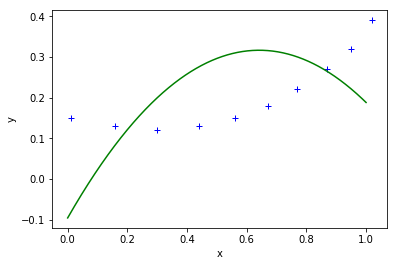

In [30]:
cur,_ =curve_fit(func,x,y)
print(cur)
l = np.linspace(0,1, 1000)
plt.plot(x,y,"b+")
plt.plot(l,func(l,*cur),"g")
plt.xlabel("x")
plt.ylabel("y")
# plt.legend()
plt.show()